# Paper CHF - 8 beats

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.metrics import specificity_score
import time

In [2]:
THREADS_TO_USE = 4

## Load dataset

In [3]:
data = pd.read_csv('../dataset/st_dataset_8beats.csv')
data = data.dropna()
data.head()

,id,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,...,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16,label
0,e0106,30.571581,30.571114,30.597163,8.654545,1.254944,0.902949,-0.773465,-1.399254,-0.734867,...,-0.052333,0.042084,-0.051954,0.052820,-0.078516,0.018113,-0.033035,-0.008121,-0.004387,NSR
1,e0106,35.327463,37.090233,36.619925,10.318908,1.501561,0.936195,-0.694743,-1.301387,-0.880195,...,-0.025711,0.004880,-0.014158,0.033816,-0.052615,-0.010039,-0.020460,-0.003424,-0.010776,NSR
2,e0106,33.754220,34.253945,34.112950,9.653801,1.420377,0.922050,-0.707779,-1.271389,-0.778260,...,-0.041095,0.024671,-0.028207,0.045623,-0.069928,-0.007982,-0.010177,-0.011244,-0.007525,NSR
3,e0106,33.428166,32.277378,32.154651,9.225828,1.332695,0.898518,-0.728415,-1.302251,-0.708089,...,-0.053417,0.034100,-0.041100,0.034451,-0.060591,-0.005673,-0.010582,-0.020471,0.001472,NSR
4,e0106,34.438584,33.565638,33.382364,9.589036,1.426830,0.886530,-0.727896,-1.310174,-0.910833,...,-0.077430,0.064301,-0.063539,0.066193,-0.087852,0.018333,-0.028678,-0.022301,0.009486,NSR


In [4]:
data['label'].replace("ST-", "ST", inplace=True)
data['label'].replace("ST+", "ST", inplace=True)

In [5]:
data['label'].value_counts()

NSR    52426
ST     15929
Name: label, dtype: int64

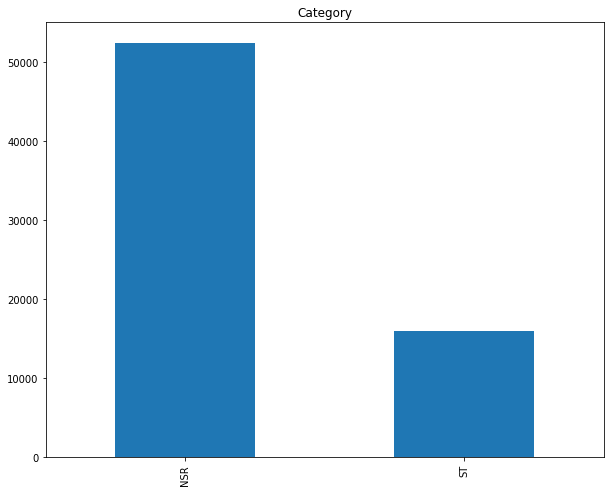

In [6]:
data['label'].value_counts().plot(kind='bar', title='Category', figsize=(10,8))
plt.show()

In [7]:
data.corr()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,mfw_5,...,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16
dw_1,1.000000,0.232673,0.111713,0.079107,0.076764,0.077147,-0.018860,0.030559,0.040220,-0.014666,...,-0.053028,-0.055461,-0.025675,-0.018685,-0.009704,-0.039241,-0.027948,-0.044903,-0.065581,-0.044688
dw_2,0.232673,1.000000,0.839282,0.452814,0.160598,0.424152,-0.484394,-0.404156,0.100065,0.435652,...,-0.136686,0.140104,0.232989,0.166906,0.045325,0.029218,0.115506,-0.000752,-0.115788,-0.079295
dw_3,0.111713,0.839282,1.000000,0.631576,0.240584,0.301445,-0.535593,-0.534332,-0.030329,0.564342,...,-0.206789,0.121560,0.266346,0.117884,-0.049549,0.051187,0.045371,-0.026800,-0.130477,-0.049044
dw_4,0.079107,0.452814,0.631576,1.000000,0.895025,0.016860,-0.237619,-0.260776,-0.029358,0.299563,...,-0.147248,0.048851,0.116574,0.042862,-0.044403,0.042171,0.026140,-0.032931,-0.089245,-0.033579
dw_5,0.076764,0.160598,0.240584,0.895025,1.000000,-0.105960,-0.011988,-0.035024,-0.012480,0.061799,...,-0.066765,0.004155,0.014207,0.013282,-0.012686,0.016035,0.013783,-0.034165,-0.041855,-0.018000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfr_12,-0.039241,0.029218,0.051187,0.042171,0.016035,-0.094790,0.068312,0.129263,0.122377,-0.090957,...,-0.127261,-0.207625,-0.097674,0.019114,0.057081,1.000000,0.003281,-0.017734,-0.318789,-0.208539
cfr_13,-0.027948,0.115506,0.045371,0.026140,0.013783,0.077604,-0.004769,0.006963,0.049874,0.008203,...,0.128357,0.032112,-0.217503,-0.271096,-0.046139,0.003281,1.000000,0.186633,0.097077,-0.171867
cfr_14,-0.044903,-0.000752,-0.026800,-0.032931,-0.034165,0.032269,0.017775,0.034991,0.012523,-0.020623,...,0.096622,0.214725,0.044225,-0.177405,-0.291133,-0.017734,0.186633,1.000000,0.157260,-0.146906
cfr_15,-0.065581,-0.115788,-0.130477,-0.089245,-0.041855,0.009040,0.083235,0.080419,-0.058850,-0.098386,...,0.258472,0.163393,-0.078272,-0.146256,-0.095566,-0.318789,0.097077,0.157260,1.000000,0.229510


In [8]:
y = data['label'].values
X = data.loc[:, ~data.columns.isin(["id", "label"])].copy()
patient_ids = data["id"].values

In [9]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

## Feature selection

### exclude features with corr > 0.95

In [10]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [11]:
print(correlated_features)

{'fft_176', 'fft_247', 'cfr_16', 'fft_183', 'fft_242', 'fft_133', 'fft_150', 'fft_161', 'fft_146', 'fft_218', 'fft_143', 'fft_165', 'fft_197', 'fft_217', 'fft_186', 'fft_207', 'fft_172', 'fft_152', 'fft_213', 'fft_160', 'fft_209', 'fft_131', 'fft_148', 'fft_155', 'fft_149', 'fft_168', 'fft_206', 'fft_170', 'fft_248', 'fft_188', 'fft_166', 'fft_231', 'fft_142', 'fft_204', 'fft_167', 'fft_136', 'fft_163', 'fft_235', 'fft_252', 'fft_244', 'fft_195', 'fft_249', 'fft_210', 'fft_147', 'fft_228', 'fft_200', 'fft_256', 'fft_191', 'fft_202', 'fft_208', 'fft_179', 'fft_219', 'fft_237', 'fft_182', 'fft_157', 'fft_138', 'fft_214', 'fft_232', 'fft_243', 'fft_193', 'fft_185', 'fft_215', 'mfw_11', 'fft_154', 'fft_201', 'fft_190', 'fft_140', 'fft_230', 'fft_199', 'fft_223', 'fft_250', 'fft_253', 'fft_130', 'fft_141', 'fft_171', 'fft_224', 'fft_227', 'fft_203', 'fft_225', 'fft_132', 'fft_184', 'fft_229', 'fft_175', 'fft_134', 'fft_164', 'fft_181', 'fft_180', 'fft_156', 'fft_212', 'fft_222', 'fft_240', 

### Random forest embeded for features selection

In [12]:
cols_no_corr = [col for col in X.columns if col not in correlated_features]

In [13]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE), threshold='1.25*median')
embeded_rf_selector.fit(X[cols_no_corr], y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=4, random_state=101),
                threshold='1.25*median')

In [14]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X[cols_no_corr].loc[:,embeded_rf_support].columns.tolist()

print('\n'.join(embeded_rf_feature), '\nselected features:', len(embeded_rf_feature))

dw_1
dw_2
dw_3
dw_4
dw_5
mfw_1
mfw_2
mfw_3
mfw_4
mfw_5
mfw_6
mfw_7
mfw_8
mfw_9
mfw_10
mfw_12
mfw_13
mfw_14
mfw_15
mfw_16
fft_1
fft_2
fft_3
fft_4
fft_5
fft_6
fft_7
fft_8
fft_9
fft_10
fft_11
fft_12
fft_13
fft_14
fft_15
fft_16
fft_17
fft_20
fft_21
fft_22
fft_24
fft_29
fft_30
fft_31
fft_32
fft_33
fft_34
fft_35
fft_36
ar_1
ar_2
ar_3
ar_4
ar_5
ar_6
ar_7
ar_8
ar_9
ar_10
ar_11
ar_16
var
cfr_1
cfr_2
cfr_3
cfr_4
cfr_5
cfr_6
cfr_7
cfr_8
cfr_9
cfr_10
cfr_11
cfr_12
cfr_13
cfr_14
cfr_15 
selected features: 77


### Visualization best features

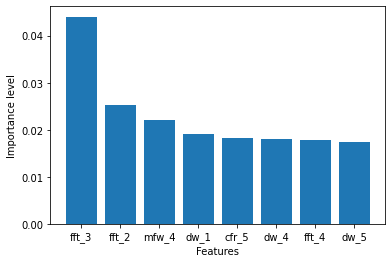

In [15]:
features_dict = dict(zip(cols_no_corr, embeded_rf_selector.estimator_.feature_importances_))
features_dict = dict(sorted(features_dict.items(), key=lambda item: item[1], reverse=True))

best_features = dict()
for index, (key, value) in enumerate(features_dict.items()):
    if index < 8:
        best_features[key] = value

plt.bar(range(len(best_features)), list(best_features.values()), align='center', )
plt.xticks(ticks=range(len(best_features)), labels=best_features.keys())
plt.xlabel('Features')
plt.ylabel('Importance level')
plt.show()

## Filter features

In [16]:
X_fsel = X[embeded_rf_feature]
X_fsel.head()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,mfw_5,...,cfr_6,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15
0,30.571581,30.571114,30.597163,8.654545,1.254944,0.902949,-0.773465,-1.399254,-0.734867,12.762118,...,0.012196,0.047766,-0.052333,0.042084,-0.051954,0.052820,-0.078516,0.018113,-0.033035,-0.008121
1,35.327463,37.090233,36.619925,10.318908,1.501561,0.936195,-0.694743,-1.301387,-0.880195,10.573212,...,0.022624,0.032716,-0.025711,0.004880,-0.014158,0.033816,-0.052615,-0.010039,-0.020460,-0.003424
2,33.754220,34.253945,34.112950,9.653801,1.420377,0.922050,-0.707779,-1.271389,-0.778260,10.515795,...,0.010279,0.036796,-0.041095,0.024671,-0.028207,0.045623,-0.069928,-0.007982,-0.010177,-0.011244
3,33.428166,32.277378,32.154651,9.225828,1.332695,0.898518,-0.728415,-1.302251,-0.708089,11.496901,...,0.005352,0.048697,-0.053417,0.034100,-0.041100,0.034451,-0.060591,-0.005673,-0.010582,-0.020471
4,34.438584,33.565638,33.382364,9.589036,1.426830,0.886530,-0.727896,-1.310174,-0.910833,10.732432,...,-0.003147,0.052752,-0.077430,0.064301,-0.063539,0.066193,-0.087852,0.018333,-0.028678,-0.022301


## Random Forest - L1SO

In [17]:
cvds = X_fsel.copy()
cvds["patient_id"] = patient_ids
cvds["label"] = y

patients = np.unique(cvds["patient_id"].values)
patients

array(['e0106', 'e0110', 'e0115', 'e0129', 'e0133', 'e0151', 'e0202',
       'e0203', 'e0204', 'e0205', 'e0206', 'e0207', 'e0208', 'e0210',
       'e0211', 'e0212', 'e0213', 'e0302', 'e0303', 'e0304', 'e0305',
       'e0306', 'e0403', 'e0404', 'e0405', 'e0406', 'e0408', 'e0409',
       'e0410', 'e0411', 'e0413', 'e0415', 'e0417', 'e0418', 'e0515',
       'e0601', 'e0602', 'e0603', 'e0605', 'e0606', 'e0607', 'e0609',
       'e0610', 'e0611', 'e0612', 'e0613', 'e0614', 'e0615', 'e0704',
       'e0801', 'e0808', 'e0817', 'e0818', 'e1301', 'e1302', 'e1304'],
      dtype=object)

In [18]:
classes = np.unique(label_encoder.inverse_transform(y))

In [19]:
result_df = pd.DataFrame()
tot = len(patients)
for i, patient in enumerate(patients):
    start_time = time.time()

    # Train and Test split
    df1 = cvds.loc[cvds["patient_id"] != patient]
    df2 = cvds.loc[cvds["patient_id"] == patient]

    y_train = df1["label"].values
    x_train = df1.loc[:, ~df1.columns.isin(['patient_id', 'label'])]
    y_test = df2["label"].values
    x_test = df2.loc[:, ~df2.columns.isin(['patient_id', 'label'])]

    # Training
    model = RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE).fit(x_train, y_train)

    # Prediction
    y_pred = model.predict(x_test)

    # Decode
    y_test_dec = label_encoder.inverse_transform(y_test)
    y_pred_dec = label_encoder.inverse_transform(y_pred)

    # get metrics
    report = classification_report(y_true=y_test_dec, y_pred=y_pred_dec, zero_division=1, output_dict=True)
    specificity = specificity_score(y_true=y_test_dec, y_pred=y_pred_dec, average="weighted")

    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']


    # save result in result_df
    result_df = result_df.append({
        "accuracy": acc,
        "specificity": specificity,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }, ignore_index=True)
    end_time = time.time()

    elapsed_seconds = end_time - start_time
    # Log result
    print("#---------------------#")
    print(i+1, "of", len(patients), "-", elapsed_seconds, "s")
    print("Accuracy", acc, "precision", precision, "specificity", specificity, "recall", recall, "f1", f1)
    print("#---------------------#")

#---------------------#
1 of 56 - 18.667592763900757 s
Accuracy 0.8215077605321508 precision 0.8533672400823988 specificity 0.17849223946784923 recall 0.8215077605321508 f1 0.7410070000661275
#---------------------#
#---------------------#
2 of 56 - 18.042016983032227 s
Accuracy 0.8024830699774267 precision 0.8414960076229687 specificity 0.19751693002257337 recall 0.8024830699774267 f1 0.7145466033236699
#---------------------#
#---------------------#
3 of 56 - 16.907806873321533 s
Accuracy 0.9204225352112676 precision 0.8930118163007337 specificity 0.12838055981573326 recall 0.9204225352112676 f1 0.8891461001737868
#---------------------#
#---------------------#
4 of 56 - 16.570454359054565 s
Accuracy 0.8643356643356643 precision 0.8827404763069099 specificity 0.13566433566433567 recall 0.8643356643356643 f1 0.8014395207193407
#---------------------#


c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
5 of 56 - 16.711426258087158 s
Accuracy 1.0 precision 1.0 specificity 0.0 recall 1.0 f1 1.0
#---------------------#


c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
6 of 56 - 16.729687929153442 s
Accuracy 1.0 precision 1.0 specificity 0.0 recall 1.0 f1 1.0
#---------------------#
#---------------------#
7 of 56 - 17.179555416107178 s
Accuracy 0.7240829346092504 precision 0.8010106579172274 specificity 0.31212876455509503 recall 0.7240829346092504 f1 0.6181138804538778
#---------------------#
#---------------------#
8 of 56 - 17.057823419570923 s
Accuracy 0.7723004694835681 precision 0.7891322201270264 specificity 0.36878819808310453 recall 0.7723004694835681 f1 0.7071655704988076
#---------------------#
#---------------------#
9 of 56 - 16.601059436798096 s
Accuracy 0.7922705314009661 precision 0.9849471478146464 specificity 0.8414431233653201 recall 0.7922705314009661 f1 0.8723373767869066
#---------------------#
#---------------------#
10 of 56 - 16.899847984313965 s
Accuracy 0.6507620941020543 precision 0.7727292090180367 specificity 0.3492379058979457 recall 0.6507620941020543 f1 0.5130858100427277
#--------------------

c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
36 of 56 - 17.574613571166992 s
Accuracy 0.9723214285714286 precision 1.0 specificity 0.0 recall 0.9723214285714286 f1 0.9859665006790402
#---------------------#
#---------------------#
37 of 56 - 17.585055828094482 s
Accuracy 0.799288256227758 precision 0.8601223255197576 specificity 0.5079373367121207 recall 0.799288256227758 f1 0.8241042898196816
#---------------------#
#---------------------#
38 of 56 - 17.22339940071106 s
Accuracy 0.057 precision 0.8190021732831062 specificity 0.9130386238306804 recall 0.057 f1 0.027747402921781822
#---------------------#
#---------------------#
39 of 56 - 17.98970627784729 s
Accuracy 0.8887372013651877 precision 0.8871159476991674 specificity 0.7886490894740179 recall 0.8887372013651877 f1 0.8877734125587354
#---------------------#
#---------------------#
40 of 56 - 17.631696462631226 s
Accuracy 0.9098360655737705 precision 0.9145794046530998 specificity 0.6285916902452896 recall 0.9098360655737705 f1 0.8994806991733221
#-

c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
44 of 56 - 18.16391158103943 s
Accuracy 0.9932795698924731 precision 1.0 specificity 0.0 recall 0.9932795698924731 f1 0.9966284558327715
#---------------------#
#---------------------#
45 of 56 - 17.688599824905396 s
Accuracy 0.62119503945885 precision 0.6529284465798137 specificity 0.4045992068110865 recall 0.62119503945885 f1 0.49334762112062397
#---------------------#
#---------------------#
46 of 56 - 17.50318694114685 s
Accuracy 0.755203171456888 precision 0.8151286587216539 specificity 0.244796828543112 recall 0.755203171456888 f1 0.6498755693395242
#---------------------#
#---------------------#
47 of 56 - 17.60011386871338 s
Accuracy 0.5592151366503153 precision 0.5891927948677833 specificity 0.5885466603761875 recall 0.5592151366503153 f1 0.5597065261943224
#---------------------#
#---------------------#
48 of 56 - 17.718880653381348 s
Accuracy 0.9780701754385965 precision 0.9761232349165597 specificity 0.09526315789473684 recall 0.9780701754385965 f1 0

c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
49 of 56 - 17.20310115814209 s
Accuracy 0.8689991863303499 precision 1.0 specificity 0.0 recall 0.8689991863303499 f1 0.9299085764040054
#---------------------#


c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
50 of 56 - 17.261022090911865 s
Accuracy 0.9942148760330578 precision 1.0 specificity 0.0 recall 0.9942148760330578 f1 0.9970990468296725
#---------------------#
#---------------------#
51 of 56 - 17.690333604812622 s
Accuracy 0.15574348132487667 precision 0.8320698288238283 specificity 0.8635027095331828 recall 0.15574348132487667 f1 0.09798493247073883
#---------------------#


c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
52 of 56 - 18.494710683822632 s
Accuracy 0.8160569105691057 precision 1.0 specificity 0.0 recall 0.8160569105691057 f1 0.8987129266927812
#---------------------#
#---------------------#
53 of 56 - 19.711530208587646 s
Accuracy 0.7959814528593508 precision 0.8161564967193925 specificity 0.4966998835407155 recall 0.7959814528593508 f1 0.7575763451534472
#---------------------#
#---------------------#
54 of 56 - 18.597644567489624 s
Accuracy 0.907103825136612 precision 0.9076955689872592 specificity 0.4409552465933458 recall 0.907103825136612 f1 0.8887089878489094
#---------------------#
#---------------------#
55 of 56 - 18.56326961517334 s
Accuracy 0.9063386944181646 precision 0.9151111345814585 specificity 0.09366130558183539 recall 0.9063386944181646 f1 0.8618089024839719
#---------------------#
#---------------------#
56 of 56 - 18.475626230239868 s
Accuracy 0.7793380140421263 precision 0.8281766829664042 specificity 0.2341149007560799 recall 0.779338014042126

In [20]:
result_df.head(10)

,accuracy,specificity,precision,recall,f1
0,0.821508,0.178492,0.853367,0.821508,0.741007
1,0.802483,0.197517,0.841496,0.802483,0.714547
2,0.920423,0.128381,0.893012,0.920423,0.889146
3,0.864336,0.135664,0.882740,0.864336,0.801440
4,1.000000,0.000000,1.000000,1.000000,1.000000
5,1.000000,0.000000,1.000000,1.000000,1.000000
6,0.724083,0.312129,0.801011,0.724083,0.618114
7,0.772300,0.368788,0.789132,0.772300,0.707166
8,0.792271,0.841443,0.984947,0.792271,0.872337
9,0.650762,0.349238,0.772729,0.650762,0.513086


In [21]:
print("######## Total ########")
print("Accuracy", result_df["accuracy"].mean())
print("Precision", result_df["precision"].mean())
print("Specificity",  result_df["specificity"].mean())
print("Recall",  result_df["recall"].mean())
print("F1",  result_df["f1"].mean())

result_df.to_csv('result/bin_8beats_l1so.csv')

######## Total ########
Accuracy 0.7636697547133229
Precision 0.8548102665091439
Specificity 0.33328716605329706
Recall 0.7636697547133229
F1 0.7278245868826533
